### Unsupervised Learning ###

As the name suggests, unsupervised learning is a machine learning technique in which models are not supervised using training dataset. Instead, models itself find the hidden patterns and insights from the given data. It can be compared to learning which takes place in the human brain while learning new things.

### K-MEANS CLUSTERİNG ###

K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as scipty
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale

In [2]:
df_1=pd.read_csv('BTC-USD.csv')
df_1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
df=df_1.drop('Date', axis=1)

In [4]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [5]:
df.isnull().sum()

Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [6]:
a=df.apply(lambda x: x.fillna(x.mean()), axis=0)

In [7]:
a.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2475 non-null   float64
 1   High       2475 non-null   float64
 2   Low        2475 non-null   float64
 3   Close      2475 non-null   float64
 4   Adj Close  2475 non-null   float64
 5   Volume     2475 non-null   float64
dtypes: float64(6)
memory usage: 116.1 KB


In [9]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2475.0,7.866536e+03,1.189356e+04,1.768970e+02,4.696455e+02,4.389210e+03,9.256402e+03,6.352375e+04
High,2475.0,8.092744e+03,1.226927e+04,2.117310e+02,5.145175e+02,4.591630e+03,9.409365e+03,6.486310e+04
Low,2475.0,7.615020e+03,1.144564e+04,1.715100e+02,4.671600e+02,4.307350e+03,9.099229e+03,6.220896e+04
Close,2475.0,7.878406e+03,1.190082e+04,1.781030e+02,4.998485e+02,4.403740e+03,9.262959e+03,6.350346e+04
Adj Close,2475.0,7.878406e+03,1.190082e+04,1.781030e+02,4.998485e+02,4.403740e+03,9.262959e+03,6.350346e+04
Volume,2475.0,1.286143e+10,1.981776e+10,5.914570e+06,6.930405e+07,4.088420e+09,1.926493e+10,3.509679e+11


In [10]:
a.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999411,0.998818,0.998557,0.998557,0.801943
High,0.999411,1.000000,0.998751,0.999370,0.999370,0.804201
Low,0.998818,0.998751,1.000000,0.999243,0.999243,0.795922
Close,0.998557,0.999370,0.999243,1.000000,1.000000,0.800689
Adj Close,0.998557,0.999370,0.999243,1.000000,1.000000,0.800689
Volume,0.801943,0.804201,0.795922,0.800689,0.800689,1.000000


MODEL

In [11]:
from sklearn.cluster import KMeans

In [12]:
model_kmeans=KMeans(n_clusters=3).fit(a)

In [13]:
model_kmeans.cluster_centers_

array([[3.59380701e+04, 3.71930956e+04, 3.45223262e+04, 3.60089650e+04,
        3.60089650e+04, 6.03371259e+10],
       [2.82852156e+03, 2.90286167e+03, 2.75409044e+03, 2.83308205e+03,
        2.83308205e+03, 2.21619175e+09],
       [1.11818474e+04, 1.14373011e+04, 1.08825182e+04, 1.11914431e+04,
        1.11914431e+04, 2.44494520e+10]])

In [14]:
clusters=model_kmeans.labels_
clusters

array([1, 1, 1, ..., 2, 2, 2])

In [15]:
centers=model_kmeans.cluster_centers_
centers

array([[3.59380701e+04, 3.71930956e+04, 3.45223262e+04, 3.60089650e+04,
        3.60089650e+04, 6.03371259e+10],
       [2.82852156e+03, 2.90286167e+03, 2.75409044e+03, 2.83308205e+03,
        2.83308205e+03, 2.21619175e+09],
       [1.11818474e+04, 1.14373011e+04, 1.08825182e+04, 1.11914431e+04,
        1.11914431e+04, 2.44494520e+10]])

In [16]:
from mpl_toolkits.mplot3d import Axes3D

In [17]:
import mpl_toolkits

In [18]:
#plt.rcParams['figure.figsize']=(25,16)
#treeD=Axes3D(plt.figure())
#plt.scatter(a.iloc[:, 0], a.iloc[:, 1], a.iloc[:, 2]);

#### Select number of clusters ####

In [19]:
!pip install yellowbrick


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from yellowbrick.cluster import KElbowVisualizer

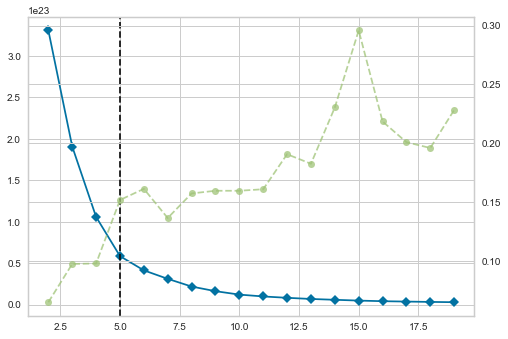

In [21]:
model_cluster=KElbowVisualizer(KMeans(), k=(2,20)).fit(a)

In [22]:
model_cluster.poof()

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
finally_model=KMeans(n_clusters=4).fit(a)
clusters=finally_model.labels_

In [24]:
pd.DataFrame({'Volume':a.index, 'Clusters':clusters})

,Volume,Clusters
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
2470,2470,2
2471,2471,2
2472,2472,0
2473,2473,0


### HIERARCHIC CLUSTERING ###

In [25]:
a.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [26]:
from scipy.cluster.hierarchy import linkage

In [27]:
hc_c=linkage(a, 'complete')
hc_a=linkage(a, 'average')
hc_s=linkage(a, 'single')

In [28]:
from scipy.cluster.hierarchy import dendrogram

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [70.0, 70.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [85.0, 85.0, 140.0, 140.0],
  [50.0, 50.0, 112.5, 112.5],
  [22.5, 22.5, 81.25, 81.25],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [215.0, 215.0, 233.75, 233.75],
  [205.0, 205.0, 224.375, 224.375],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [272.5, 272.5, 300.0, 300.0],
  [214.6875, 214.6875, 286.25, 286.25],
  [180.0, 180.0, 250.46875, 250.46875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [345

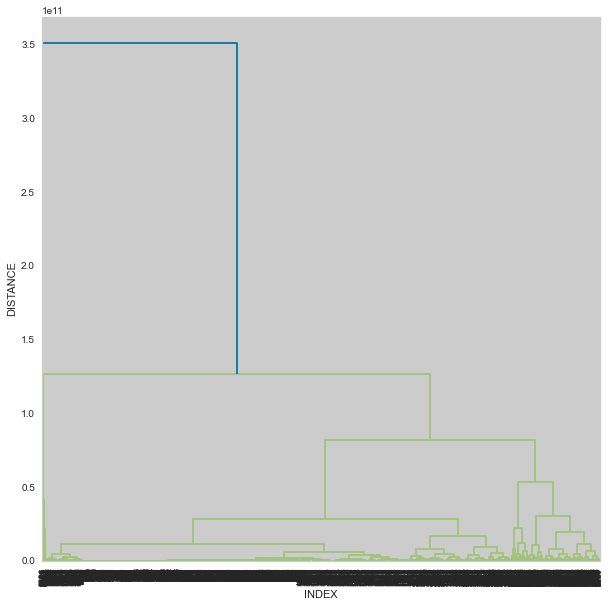

In [29]:
plt.figure(figsize=(10,10))
plt.xlabel('INDEX')
plt.ylabel('DISTANCE')
dendrogram(hc_c, leaf_font_size=8)

#### Select number of clusters ####

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
model_clusters=AgglomerativeClustering(n_clusters=4, linkage='ward').fit(a)

PREDICT

In [36]:
model_clusters.fit_predict(a)[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [37]:
pd.DataFrame({'Volume':a.index, 'Clusters':clusters})

,Volume,Clusters
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
2470,2470,2
2471,2471,2
2472,2472,0
2473,2473,0


### PRINCIPAL COMPONENT ANALYSİS (PCA) ###

The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss.

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
a=StandardScaler().fit_transform(a)
a[:5]

array([[-0.62236751, -0.62156167, -0.62591947, -0.62370227, -0.62370227,
        -0.64805345],
       [-0.62312471, -0.62248399, -0.62935536, -0.62646684, -0.62646684,
        -0.64737582],
       [-0.62587944, -0.62485014, -0.63185219, -0.62895827, -0.62895827,
        -0.64720238],
       [-0.62835439, -0.62522016, -0.63138458, -0.62777256, -0.62777256,
        -0.64725568],
       [-0.6272265 , -0.62610629, -0.63109638, -0.62861999, -0.62861999,
        -0.64777469]])

In [40]:
from sklearn.decomposition import PCA

In [41]:
model_pca=PCA(n_components=2)
model_pca_fit=model_pca.fit(a)

In [43]:
model_pca.explained_variance_ratio_

array([0.94688007, 0.05255801])